<a href="https://colab.research.google.com/github/djswoosh/Uni-Bits/blob/main/Time_Series_Analysis_of_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualise from pylab import rcParamas


In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7df = pd.read_csv('/content/monthly-car-sales.csv')

SyntaxError: ignored

In [5]:
df = pd.read_csv('/content/monthly-car-sales.csv')

In [6]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [9]:
df.columns=['Month', 'Sales']
df=df.dropna()
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True) #set date as index
df.head()


,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


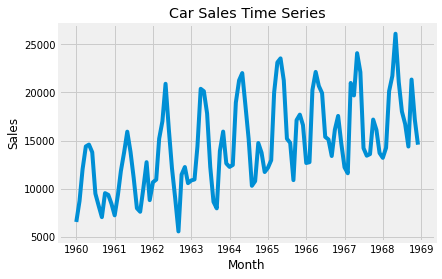

In [10]:
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Car Sales Time Series")
plt.plot(df)

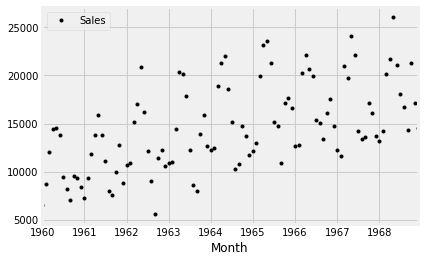

In [11]:
#ScatterPlotofDataPoints

df.plot(style = 'k.')
plt.show()

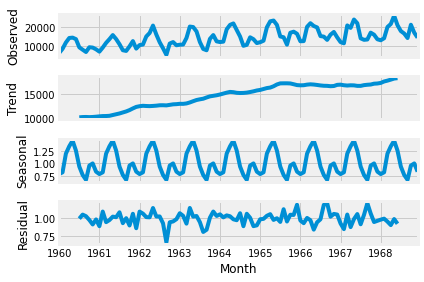

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

#Seperating Trend and Seasonality

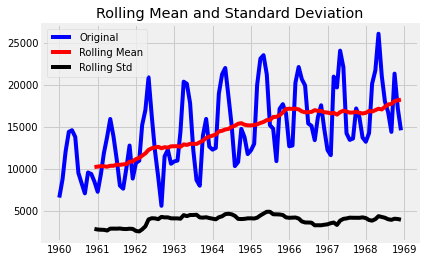

Results of dickey fuller test
Test Statistics                -1.223813
p-value                         0.663269
No. of lags used               12.000000
Number of observations used    95.000000
critical value (1%)            -3.501137
critical value (5%)            -2.892480
critical value (10%)           -2.583275
dtype: float64


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Sales'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

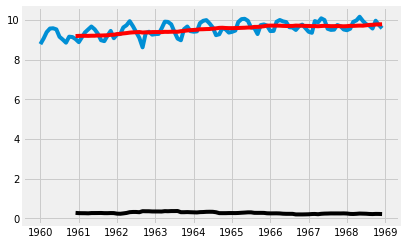

In [15]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [16]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

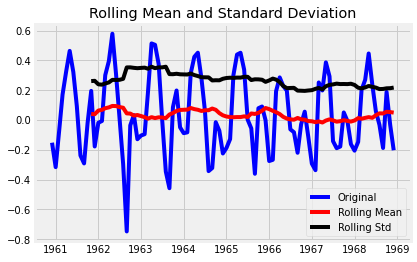

Results of dickey fuller test
Test Statistics                -2.023542
p-value                         0.276347
No. of lags used               12.000000
Number of observations used    84.000000
critical value (1%)            -3.510712
critical value (5%)            -2.896616
critical value (10%)           -2.585482
dtype: float64


In [17]:
test_stationarity(df_log_moving_avg_diff)

In [18]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

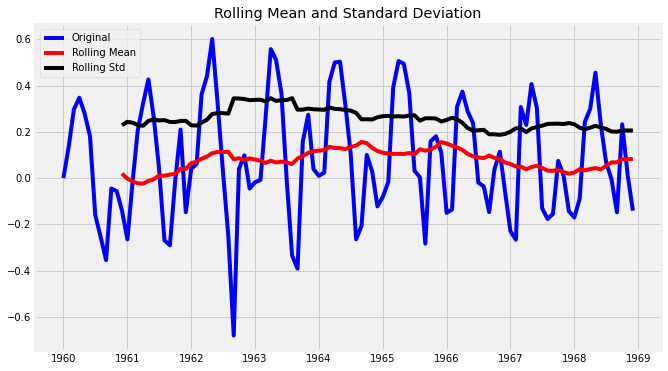

Results of dickey fuller test
Test Statistics                -2.597172
p-value                         0.093583
No. of lags used               13.000000
Number of observations used    94.000000
critical value (1%)            -3.501912
critical value (5%)            -2.892815
critical value (10%)           -2.583454
dtype: float64


In [19]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

In [22]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.plot(df_log_diff)#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)test_stationarity(df_log_diff)

SyntaxError: ignored

In [23]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()trend = result.trend
trend.dropna(inplace=True)seasonality = result.seasonal
seasonality.dropna(inplace=True)residual = result.resid
residual.dropna(inplace=True)test_stationarity(residual)

SyntaxError: ignored